In [59]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [60]:
#Reading the csv file of dataset into panda dataframe

data = pd.read_csv("stress_predict_data.csv")

In [61]:
#Displaying first 6 rows of dataset

data.head()

,Participant,HR,respr,Time(sec),Label
0,2,118.00,12.127693,1644227583,0
1,2,113.50,12.127693,1644227584,0
2,2,93.00,12.127693,1644227585,0
3,2,93.25,12.127693,1644227586,0
4,2,86.40,12.127693,1644227587,0


In [62]:
#Cleaning dataset by removing missing values

data_cleaned = data.dropna(subset=['HR'])

In [63]:
#Assigning independent and dependent variable from processed dataset

independent_variable = data_cleaned.iloc[:,1:4]
dependent_variable = data_cleaned.iloc[:, 4]

print(independent_variable)
print(dependent_variable)

            HR      respr   Time(sec)
0       118.00  12.127693  1644227583
1       113.50  12.127693  1644227584
2        93.00  12.127693  1644227585
3        93.25  12.127693  1644227586
4        86.40  12.127693  1644227587
...        ...        ...         ...
112511   65.45  11.546524  1646842243
112512   65.47  11.520924  1646842244
112513   65.50  11.495324  1646842245
112514   65.50  11.466879  1646842246
112515   65.50  11.441279  1646842247

[112472 rows x 3 columns]
0         0
1         0
2         0
3         0
4         0
         ..
112511    0
112512    0
112513    0
112514    0
112515    0
Name: Label, Length: 112472, dtype: int64


In [69]:
#Splitting the dataset into training set and testing set using "train_test_split" function

X_train, X_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size = 0.2, 
                                                    random_state = 0)

#Splitting the training set into train set and validation set using "train_test_split" function

X_train_set, X_validation_set, y_train_set, y_validation_set = train_test_split(X_train, y_train, test_size = 0.2, 
                                                    random_state = 0)

#Performing feature scaling using standardscaler to make independent variables on same scale

sc = StandardScaler()
X_train_set = sc.fit_transform(X_train_set)
X_validation_set = sc.transform(X_validation_set)
X_test = sc.transform(X_test)

In [70]:
#Applying Random Forest Algorithm to train with training set

model_randomForest = RandomForestClassifier(n_estimators=300)

model_randomForest.fit(X_train_set, y_train_set)

RandomForestClassifier(n_estimators=300)

In [71]:
#Using validation set to evaluate the model

y_pred = model_randomForest.predict(X_validation_set)

#Finding accuracy score of the model on validation set

accuracy_RandomForest = accuracy_score(y_validation_set, y_pred)
print("Accuracy:", accuracy_RandomForest)

Accuracy: 0.9841631473660813


In [72]:
#Finding confusion matrix on validation set

confusion_RandomForest = confusion_matrix(y_validation_set, y_pred)
print("Confusion Matrix:", confusion_RandomForest)

Confusion Matrix: [[12041    72]
 [  213  5670]]


AUROC: 0.9789249777917808


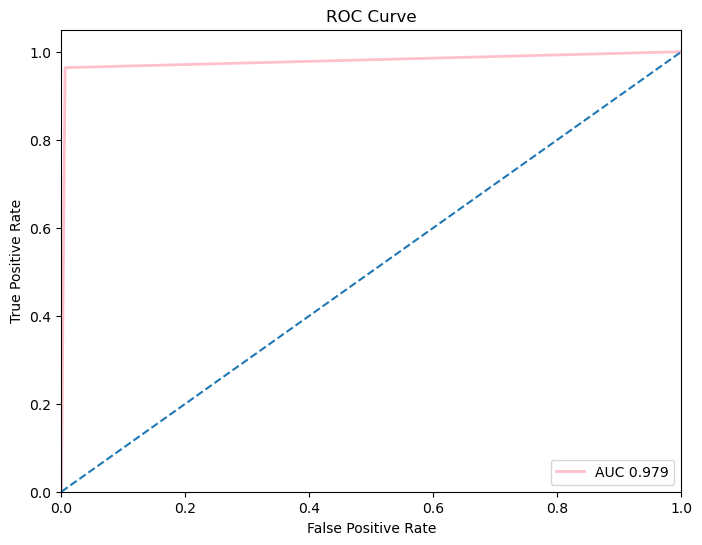

In [73]:
#Finding ROC on validation set

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_set, y_pred)

#Finding Area under ROC

areaUnderROC_RandomForest = roc_auc_score(y_validation_set, y_pred)
print("AUROC:", areaUnderROC_RandomForest)

#Plotting the ROC Curve on validation set

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2, label='AUC %0.3f' % areaUnderROC_RandomForest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
#Finding precision of the model on validation set for t-test

precision__RandomForest = precision_score(y_validation_set,y_pred)
print("Precision:", precision__RandomForest)

Precision: 0.987460815047022


In [75]:
#Finding recall of the model on validation set for t-test

recall__RandomForest = recall_score(y_validation_set,y_pred)
print("Recall:", recall__RandomForest)

Recall: 0.9637939826619072


In [76]:
#Finding recall of the model on validation set for t-test

f1_score_RandomForest = f1_score(y_validation_set,y_pred)
print("F1 Score:", f1_score_RandomForest)

F1 Score: 0.975483870967742


In [77]:
#Using test set to test the model

y_pred = model_randomForest.predict(X_test)

In [78]:
#Finding accuracy score of the model on test set

accuracy_RandomForest_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RandomForest_test)

Accuracy: 0.9844409868859747


In [79]:
#Finding confusion matrix on test set

confusion_RandomForest_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_RandomForest_test)

Confusion Matrix: [[15105    85]
 [  265  7040]]


AUROC: 0.9790638451843611


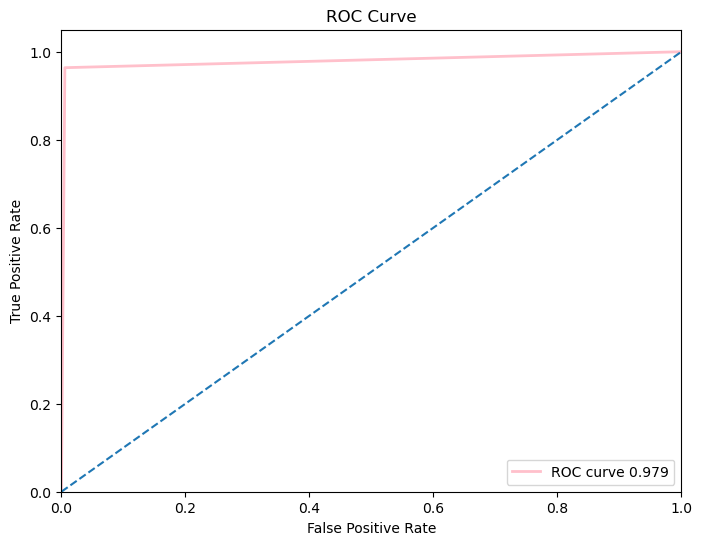

In [80]:
#Finding ROC on test set

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#Finding Area under ROC

areaUnderROC = roc_auc_score(y_test, y_pred)
print("AUROC:", areaUnderROC)

#Plotting the ROC Curve on test set

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2, label='AUC %0.3f' % areaUnderROC)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [81]:
#Applying Xgboost algorithm to train with training set

model_xgboost = XGBClassifier(learning_rate=1)
model_xgboost.fit(X_train_set, y_train_set)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
#Using validation set to evaluate the model

y_pred = model_xgboost.predict(X_validation_set)

In [83]:
#Finding accuracy score of the model on validation set

accuracy_Xgboost = accuracy_score(y_validation_set, y_pred)
print("Accuracy:", accuracy_Xgboost)

Accuracy: 0.972716159146477


In [84]:
#Finding confusion matrix on validation set

confusion_Xgboost = confusion_matrix(y_validation_set, y_pred)
print("Confusion Matrix:", confusion_Xgboost)

Confusion Matrix: [[11858   255]
 [  236  5647]]


AUROC: 0.9694163250727305


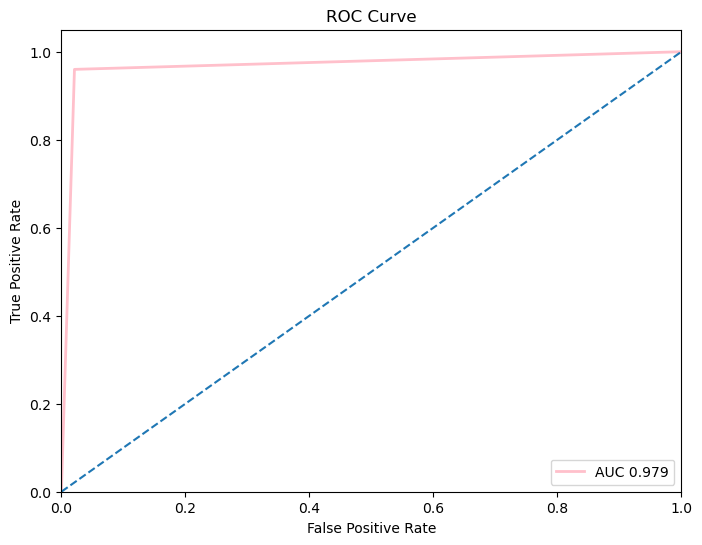

In [85]:
#Finding ROC on validation set

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation_set, y_pred)

#Finding Area under ROC

areaUnderROC_xgboost = roc_auc_score(y_validation_set, y_pred)
print("AUROC:", areaUnderROC_xgboost)

#Plotting the ROC Curve on validation set

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2, label='AUC %0.3f' % areaUnderROC)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [86]:
#Finding precision of the model on validation set for t-test

precision__Xgboost = precision_score(y_validation_set,y_pred)
print("Precision:", precision__Xgboost)

Precision: 0.9567943070145714


In [87]:
#Finding recall of the model on validation set for t-test

recall__Xgboost = recall_score(y_validation_set,y_pred)
print("Recall:", recall__Xgboost)

Recall: 0.9598844127146013


In [88]:
#Finding recall of the model on validation set for t-test

f1_score_Xgboost = f1_score(y_validation_set,y_pred)
print("F1 Score:", f1_score_Xgboost)

F1 Score: 0.9583368689011454


In [89]:
#Using test set to test the model

y_pred = model_xgboost.predict(X_test)

In [90]:
#Finding accuracy score of the model on test set

accuracy_Xgboost_test = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_Xgboost_test)

Accuracy: 0.9707490553456324


In [91]:
#Finding confusion matrix on test set

confusion_Xgboost_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_Xgboost_test)

Confusion Matrix: [[14870   320]
 [  338  6967]]


AUROC: 0.9663319152924467


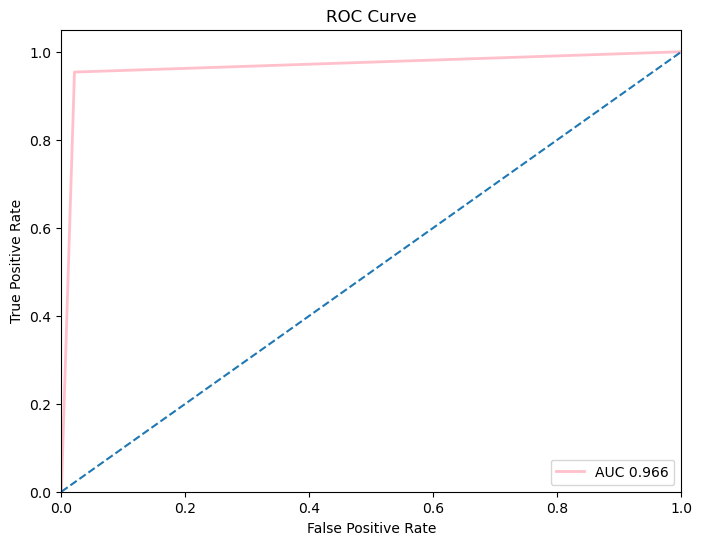

In [92]:
#Finding ROC on test set

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

#Finding Area under ROC

areaUnderROC = roc_auc_score(y_test, y_pred)
print("AUROC:", areaUnderROC)

#Plotting the ROC Curve on test set

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2, label='AUC %0.3f' % areaUnderROC)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [30]:
#Storing all the metrics values in array for t-test

randomForest_metrics = [accuracy_RandomForest, precision__RandomForest, recall__RandomForest, f1_score_RandomForest, areaUnderROC_RandomForest]
xgboost_metrics = [accuracy_Xgboost, precision__Xgboost, recall__Xgboost, f1_score_Xgboost, areaUnderROC_xgboost]

In [31]:
#Performing t-test to compare the two classifiers

t_stat, p_value = stats.ttest_rel(randomForest_metrics, xgboost_metrics)

if p_value < 0.05:
    print("The classifiers have a considerable difference.")
else:
    print("The classifiers have no considerable difference.")

The classifiers have a considerable difference.


In [95]:
kFold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Perform cross-validation for the Random Forest model
rf_cross_validation_accuracy = cross_val_score(model_randomForest, independent_variable, dependent_variable, cv=kFold, scoring='accuracy')

# Perform cross-validation for the XGBoost model
xgb_cross_validation_accuracy = cross_val_score(model_xgboost, independent_variable, dependent_variable, cv=kFold, scoring='accuracy')


In [96]:
#Calculating confusion matrix, ROC and AUROC using k-fold cross validation

#Initializing arrays to store the values
confusionMatrixArray_rf = []
confusionMatrixArray_xgb = []
roc_RandomForest = []
roc_Xgboost = []
auroc_RandomForest = []
auroc_Xgboost = []

for trainSetIndex, testSetIndex in kFold.split(independent_variable, dependent_variable):
    X_train, X_test = independent_variable.iloc[trainSetIndex], independent_variable.iloc[testSetIndex]
    y_train, y_test = dependent_variable.iloc[trainSetIndex], dependent_variable.iloc[testSetIndex]
    
    #Random forest algorithm 
    model_randomForest.fit(X_train, y_train)
    y_prediction_rf = model_randomForest.predict(X_test)
    #calculating confusion matrix
    confusionMatrix_rf = confusion_matrix(y_test, y_prediction_rf)
    confusionMatrixArray_rf.append(confusionMatrix_rf)
    # Calculating ROC curve 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prediction_rf)
    roc_RandomForest.append((false_positive_rate, true_positive_rate))
    # Calculating AUROC 
    auroc_rf = auc(false_positive_rate, true_positive_rate)
    auroc_RandomForest.append(auroc_rf)
    
    #Xgboost algorithm 
    model_xgboost.fit(X_train, y_train)
    y_prediction_xgb = model_xgboost.predict(X_test)
    #calculating confusion matrix
    confusionMatrix_xgb   = confusion_matrix(y_test, y_prediction_xgb)
    confusionMatrixArray_xgb.append(confusionMatrix_xgb)
    # Calculating ROC curve 
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prediction_xgb)
    roc_Xgboost.append((false_positive_rate, true_positive_rate))
    # Calculating AUROC 
    auroc_xgb = auc(false_positive_rate, true_positive_rate)
    auroc_Xgboost.append(auroc_xgb)
    
#Calculating the mean of confusion matrix
confusionMatrixMean_rf = np.mean(confusionMatrixArray_rf)
confusionMatrixMean_xgb = np.mean(confusionMatrixArray_xgb)

#Calculating the mean AUROCs 
mean_auroc_rf = np.mean(auroc_RandomForest)
mean_auroc_xgb = np.mean(auroc_Xgboost)

#Printing mean values of accuracy, confusion matrix and auroc
print("Random Forest Cross Validation Accuracy: Mean = ", rf_cross_validation_accuracy.mean())
print("XGBoost Cross Validation Accuracy: Mean = ", xgb_cross_validation_accuracy.mean())
print('Random Forest Confusion Matrix: Mean = ', confusionMatrixMean_rf)
print('XGBoost Confusion Matrix: Mean = ', confusionMatrixMean_xgb)
print('Random Forest AUROC: Mean = ', mean_auroc_rf)
print('XGBoost AUROC: Mean = ', mean_auroc_xgb)

Random Forest Cross Validation Accuracy: Mean =  0.9818443864151666
XGBoost Cross Validation Accuracy: Mean =  0.9737712346810738
Random Forest Confusion Matrix: Mean =  2811.8
XGBoost Confusion Matrix: Mean =  2811.8
Random Forest AUROC: Mean =  0.9769965090741207
XGBoost AUROC: Mean =  0.969201396186748


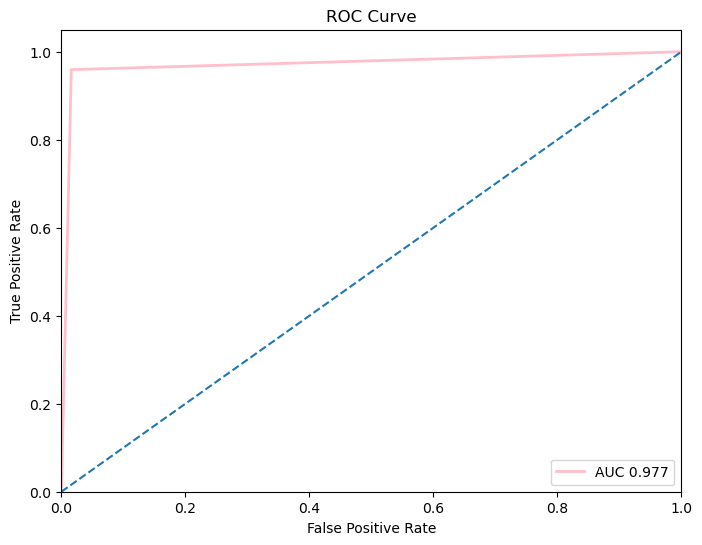

In [97]:
#Plotting the ROC Curve on sratified k-fold cross validation

plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='pink', lw=2, label='AUC %0.3f' % mean_auroc_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()